# Анализ исторических данных

In [1]:
import pandas as pd
# Чтение CSV-файла в датафрейм
df = pd.read_csv('temperature_data.csv')
df

,city,timestamp,temperature,season
0,New York,2010-01-01,-4.939104,winter
1,New York,2010-01-02,0.666547,winter
2,New York,2010-01-03,2.944243,winter
3,New York,2010-01-04,-0.922274,winter
4,New York,2010-01-05,8.476105,winter
...,...,...,...,...
54745,Mexico City,2019-12-25,5.280463,winter
54746,Mexico City,2019-12-26,-0.192964,winter
54747,Mexico City,2019-12-27,12.703575,winter
54748,Mexico City,2019-12-28,8.300573,winter


In [3]:
cities = df['city'].unique().tolist()
cities

['New York',
 'London',
 'Paris',
 'Tokyo',
 'Moscow',
 'Sydney',
 'Berlin',
 'Beijing',
 'Rio de Janeiro',
 'Dubai',
 'Los Angeles',
 'Singapore',
 'Mumbai',
 'Cairo',
 'Mexico City']

In [5]:
import pandas as pd


def analise_data(city):
    A = df[df['city'] == city]['temperature']
    B = df[df['city'] == city]['temperature'].rolling(window=30).mean()
    Date = df['timestamp'][df['city'] == city]
    #записываем скользящее среднее для города
    df.loc[A.index, 'Скользящее среднее температуры (30 дней)'] = B.copy()
    #запишем среднюю температуру и стандартное отклонение для каждого сезона в городе
    df.loc[A.index, 'Средняя температура по сезону'] = df[df['city']== city].groupby(['season'])['temperature'].transform(lambda x: x.mean())

    df.loc[A.index, 'Cтандартное отклонение температуры по сезону'] = df[df['city']== city].groupby(['season'])['temperature'].transform(lambda x: x.std())

    #выявляем аномалии, где температура выходит за пределы  среднее ± 2σ
    df.loc[A.index, 'Аномалия по сезону'] = df[df['city']== city].groupby(['season'])['temperature'].transform(lambda x: (x > (x.mean() + 2* x.std())) | (x < (x.mean() -2* x.std())))
    


In [7]:
analise_data('Moscow')

In [9]:
df[(df['city'] == 'Moscow') & (df['season'] == 'summer')][:10]

,city,timestamp,temperature,season,Скользящее среднее температуры (30 дней),Средняя температура по сезону,Cтандартное отклонение температуры по сезону,Аномалия по сезону
14751,Moscow,2010-06-01,12.398310,summer,5.497796,17.976799,5.070075,False
14752,Moscow,2010-06-02,18.905986,summer,5.840288,17.976799,5.070075,False
14753,Moscow,2010-06-03,29.870943,summer,6.827377,17.976799,5.070075,True
14754,Moscow,2010-06-04,22.369355,summer,7.572457,17.976799,5.070075,False
14755,Moscow,2010-06-05,18.399816,summer,8.153733,17.976799,5.070075,False
14756,Moscow,2010-06-06,25.781593,summer,8.591585,17.976799,5.070075,False
14757,Moscow,2010-06-07,22.373832,summer,9.025469,17.976799,5.070075,False
14758,Moscow,2010-06-08,13.036939,summer,8.963876,17.976799,5.070075,False
14759,Moscow,2010-06-09,9.818899,summer,9.106689,17.976799,5.070075,False
14760,Moscow,2010-06-10,20.568533,summer,9.946605,17.976799,5.070075,False


In [11]:
df[(df['city'] == 'Moscow') & (df['season'] == 'summer') & (df['Аномалия по сезону'] == True)][:10]

,city,timestamp,temperature,season,Скользящее среднее температуры (30 дней),Средняя температура по сезону,Cтандартное отклонение температуры по сезону,Аномалия по сезону
14753,Moscow,2010-06-03,29.870943,summer,6.827377,17.976799,5.070075,True
14767,Moscow,2010-06-17,28.692910,summer,13.690941,17.976799,5.070075,True
14772,Moscow,2010-06-22,6.733117,summer,15.769117,17.976799,5.070075,True
14783,Moscow,2010-07-03,32.114921,summer,19.514520,17.976799,5.070075,True
14840,Moscow,2010-08-29,2.227989,summer,18.098711,17.976799,5.070075,True
15132,Moscow,2011-06-17,5.427547,summer,10.569357,17.976799,5.070075,True
15145,Moscow,2011-06-30,7.612003,summer,17.011074,17.976799,5.070075,True
15485,Moscow,2012-06-04,5.986741,summer,7.664616,17.976799,5.070075,True
15520,Moscow,2012-07-09,7.161957,summer,17.166266,17.976799,5.070075,True
15541,Moscow,2012-07-30,28.935951,summer,17.156898,17.976799,5.070075,True


## Распараллелим проведение этого анализа

In [14]:
from multiprocessing import Process
import time

start = time.time()

def print_task(city):
    print(f"Процесс {city} начал выполнение")
    analise_data(city)
    print(f"Процесс {city} завершился")

processes = [Process(target=print_task, args=(i,)) for i in cities]
for p in processes:
    p.start()
for p in processes:
    p.join()


end = time.time()

print(f"Время выполнения с потоками: {end - start:.2f} секунд")

Процесс New York начал выполнениеПроцесс Paris начал выполнениеПроцесс London начал выполнение


Процесс Tokyo начал выполнениеПроцесс Moscow начал выполнение

Процесс Berlin начал выполнениеПроцесс Sydney начал выполнениеПроцесс London завершился
Процесс Beijing начал выполнение
Процесс Rio de Janeiro начал выполнение


Процесс Paris завершился
Процесс Los Angeles начал выполнениеПроцесс Dubai начал выполнение
Процесс New York завершилсяПроцесс Singapore начал выполнение


Процесс Rio de Janeiro завершился
Процесс Mumbai начал выполнениеПроцесс Tokyo завершился
Процесс Moscow завершился

Процесс Cairo начал выполнениеПроцесс Sydney завершилсяПроцесс Mexico City начал выполнениеПроцесс Berlin завершился
Процесс Beijing завершился



Процесс Dubai завершилсяПроцесс Singapore завершился
Процесс Cairo завершился
Процесс Los Angeles завершился

Процесс Mumbai завершился
Процесс Mexico City завершился
Время выполнения с потоками: 0.67 секунд


In [16]:
cities

['New York',
 'London',
 'Paris',
 'Tokyo',
 'Moscow',
 'Sydney',
 'Berlin',
 'Beijing',
 'Rio de Janeiro',
 'Dubai',
 'Los Angeles',
 'Singapore',
 'Mumbai',
 'Cairo',
 'Mexico City']

## Выполним анализ исторических данных без распараллеливания

In [19]:
import time

start = time.time()

for city in cities:
    analise_data(city)
    


end = time.time()

print(f"Время выполнения без потоков: {end - start:.2f} секунд")

Время выполнения без потоков: 0.59 секунд


# Мониторинг текущей температуры

In [22]:
api_key = '' # введите свой ключик
url = "http://api.openweathermap.org/data/2.5/weather?"+ "appid=" + api_key + "&q="

urls = [url + city for city in cities]
urls

['http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=New York',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=London',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Paris',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Tokyo',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Moscow',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Sydney',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Berlin',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Beijing',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Rio de Janeiro',
 'http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Dubai',
 '

In [24]:
df['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [26]:
import datetime

# Получаем текущую дату и время
now = datetime.datetime.now()

# Определяем сезон на основе текущего месяца
if now.month in (1, 2, 12):
    current_season = 'winter'
elif now.month in (3, 4, 5):
    current_season = 'spring'
elif now.month in (6, 7, 8):
    current_season = 'summer'
else:
    current_season = 'autumn'

# Выводим на экран текущее время года
print('Текущее вреся года: ', current_season)

Текущее вреся года:  winter


## Мониторинг и анализ текущей темперетуры асинхронными методами

In [29]:
import nest_asyncio
nest_asyncio.apply()
cities

['New York',
 'London',
 'Paris',
 'Tokyo',
 'Moscow',
 'Sydney',
 'Berlin',
 'Beijing',
 'Rio de Janeiro',
 'Dubai',
 'Los Angeles',
 'Singapore',
 'Mumbai',
 'Cairo',
 'Mexico City']

In [31]:
import aiohttp
import asyncio

import time

start = time.time()

async def fetch_data(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            x = await response.json()
            if x["cod"] == 200:
                print(f"Получены данные с {url}. Код ответа сервера: {x["cod"]}")
                y = x["main"]
                print(f"Температура в {x["name"]} в кельвинах: {y["temp"]}")
                temp = y["temp"] - 273.15
                print(f"Температура в {x["name"]} в градусах Цельсия: {temp}")


                m = df[ (df['city']== x["name"]) & (df['season'] == current_season)]['temperature'].mean()
                st = df[ (df['city']== x["name"]) & (df['season'] == current_season)]['temperature'].std()
                
                if (temp > (m +  2* st) ) | (temp < (m -2* st) ):
                    print("!!! Текущая температура в города является аномальной !!!")
                
                
            
            else:
                print()
                print(f"Ошибка запроса {x["cod"]}!")
                print()



async def main():
    urls = [url + city for city in cities]
    tasks = [fetch_data(url) for url in urls]
    await asyncio.gather(*tasks)

asyncio.run(main())


end = time.time()

print('\n\n\n')
print(f"Время выполнения асинхронными методами: {end - start:.2f} секунд")

Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Moscow. Код ответа сервера: 200
Температура в Moscow в кельвинах: 274.95
Температура в Moscow в градусах Цельсия: 1.8000000000000114
!!! Текущая температура в города является аномальной !!!
Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Tokyo. Код ответа сервера: 200
Температура в Tokyo в кельвинах: 276.24
Температура в Tokyo в градусах Цельсия: 3.090000000000032
Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=London. Код ответа сервера: 200
Температура в London в кельвинах: 272.98
Температура в London в градусах Цельсия: -0.16999999999995907
Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Berlin. Код ответа сервера: 200
Температура в Berlin в кельвинах: 274.19
Температура в Berlin в градусах Цельсия: 1.040000

## Мониторинг и анализ текущей темперетуры синхронно

In [34]:
import time
import requests




start = time.time()

urls = [url + city for city in cities]
for url in urls:
    response = requests.get(url)
    x = response.json()
    if x["cod"] == 200:
        print(f"Получены данные с {url}. Код ответа сервера: {x["cod"]}")
        y = x["main"]
        print(f"Температура в {x["name"]} в кельвинах: {y["temp"]}")
        temp = y["temp"] - 273.15
        print(f"Температура в {x["name"]} в градусах Цельсия: {temp}")


        m = df[ (df['city']== x["name"]) & (df['season'] == current_season)]['temperature'].mean()
        st = df[ (df['city']== x["name"]) & (df['season'] == current_season)]['temperature'].std()
                
        if (temp > (m +  2* st) ) | (temp < (m -2* st) ):
            print("!!! Текущая температура в города является аномальной !!!")    
    else:
        print()
        print(f"Ошибка запроса {x["cod"]}!")
        print()
    
    


end = time.time()
print('\n\n\n')
print(f"Время выполнения синхронными методами: {end - start:.2f} секунд")

Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=New York. Код ответа сервера: 200
Температура в New York в кельвинах: 275.34
Температура в New York в градусах Цельсия: 2.1899999999999977
Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=London. Код ответа сервера: 200
Температура в London в кельвинах: 272.98
Температура в London в градусах Цельсия: -0.16999999999995907
Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Paris. Код ответа сервера: 200
Температура в Paris в кельвинах: 274.71
Температура в Paris в градусах Цельсия: 1.5600000000000023
Получены данные с http://api.openweathermap.org/data/2.5/weather?appid=9ca2a6bfebb0a3f9878639463e9f9ef4&q=Tokyo. Код ответа сервера: 200
Температура в Tokyo в кельвинах: 276.24
Температура в Tokyo в градусах Цельсия: 3.090000000000032
Получены данные с http://api.openweathermap

Время выполнения асинхронными методами: 0.40 секунд.

Лучше использовать асинхронные методы для input-output bound задач.

# Графики для стримлита и описательные статистики

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54750 entries, 0 to 54749
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   city                                          54750 non-null  object 
 1   timestamp                                     54750 non-null  object 
 2   temperature                                   54750 non-null  float64
 3   season                                        54750 non-null  object 
 4   Скользящее среднее температуры (30 дней)      54315 non-null  float64
 5   Средняя температура по сезону                 54750 non-null  float64
 6   Cтандартное отклонение температуры по сезону  54750 non-null  float64
 7   Аномалия по сезону                            54750 non-null  object 
dtypes: float64(4), object(4)
memory usage: 3.3+ MB


In [40]:
df.head()

,city,timestamp,temperature,season,Скользящее среднее температуры (30 дней),Средняя температура по сезону,Cтандартное отклонение температуры по сезону,Аномалия по сезону
0,New York,2010-01-01,-4.939104,winter,NaN,-0.101247,5.276914,False
1,New York,2010-01-02,0.666547,winter,NaN,-0.101247,5.276914,False
2,New York,2010-01-03,2.944243,winter,NaN,-0.101247,5.276914,False
3,New York,2010-01-04,-0.922274,winter,NaN,-0.101247,5.276914,False
4,New York,2010-01-05,8.476105,winter,NaN,-0.101247,5.276914,False


In [76]:
city = 'Moscow'
data = df[df['city'] == city]
data[data['season'] == 'winter'][['temperature', 'Скользящее среднее температуры (30 дней)']].describe()

,temperature,Скользящее среднее температуры (30 дней)
count,900.000000,871.000000
mean,-9.842448,-6.801339
std,4.909468,5.200803
min,-26.536876,-11.831816
25%,-13.229633,-10.114514
50%,-9.864305,-9.367302
75%,-6.419244,-5.078927
max,3.262720,8.665652


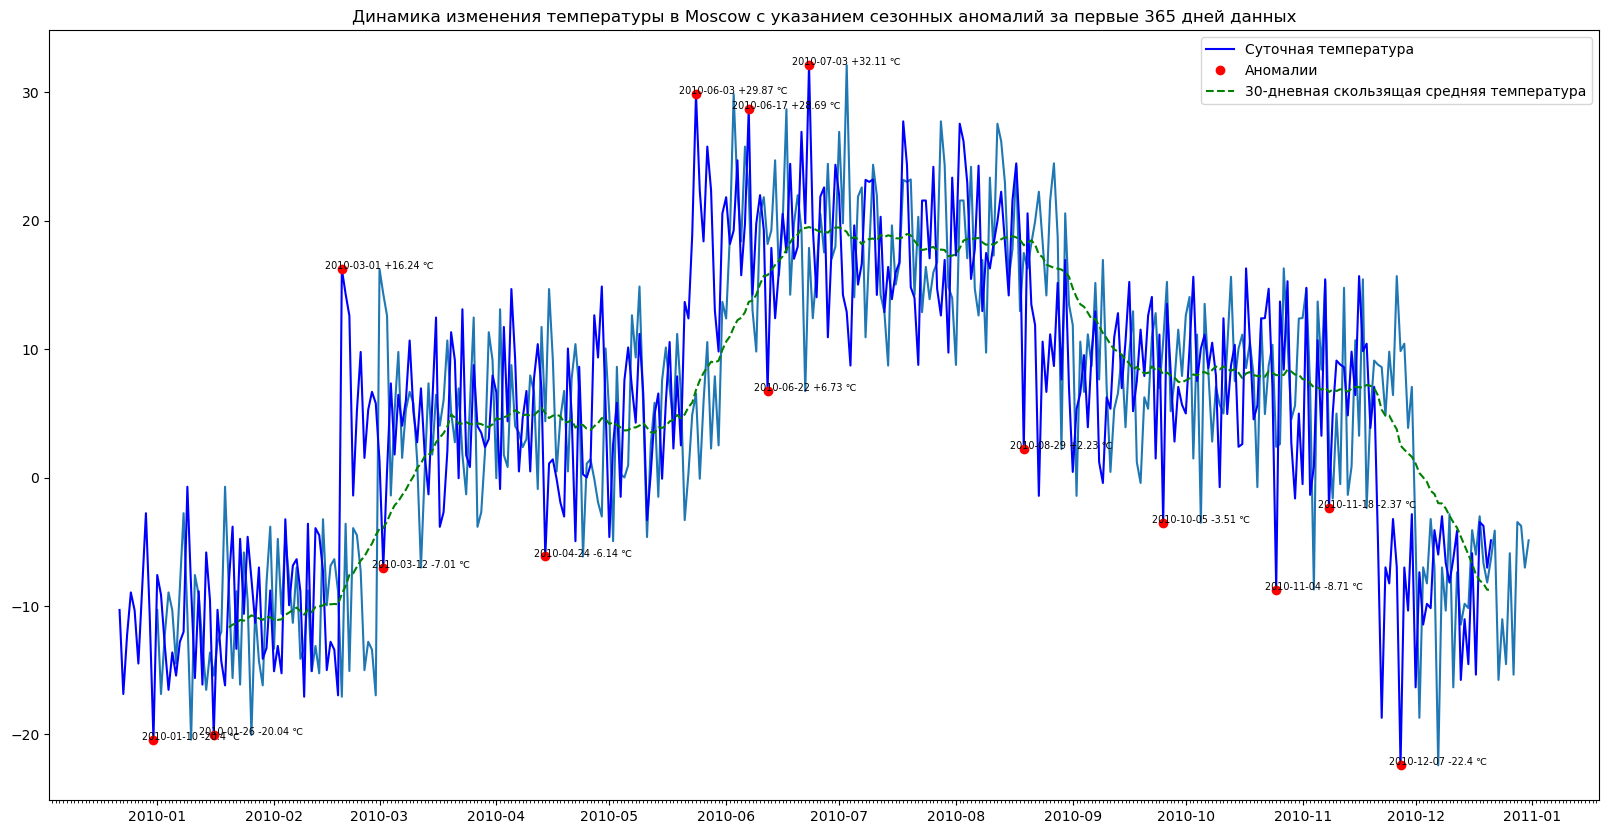

In [122]:
import matplotlib.pyplot as plt

from datetime import date, time, datetime
import matplotlib.dates as mdates

city = 'Moscow'
data = df[df['city'] == city]

start = 0
stop = 365

temp = data['temperature'][start:stop]
dates = data['timestamp'][start:stop]


temp_abnormal = data['temperature'][start:stop][data['Аномалия по сезону'] == True]
date_abnormal = data['timestamp'][start:stop][data['Аномалия по сезону'] == True]

B = temp.rolling(window=30).mean()



events = []
abnormal_events = []
for i in dates:
    date_string = i
    format = '%Y-%m-%d'  # указываем формат строки даты
    d = datetime.strptime(date_string, format)
    dt = datetime(d.year, d.month, d.day)
    events.append(dt)
    if i in date_abnormal.tolist():
        abnormal_events.append(dt)


months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%Y-%m')


fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(events, temp)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)



plt.title(f"Динамика изменения температуры в {city} c указанием сезонных аномалий за первые 365 дней данных")

plt.plot(temp, 'b',  label="Суточная температура")
plt.plot(temp_abnormal, 'ro',  label="Аномалии")

plt.plot(B, 'g--',  label="30-дневная скользящая средняя температура")





for f, b, i in zip(abnormal_events, temp_abnormal.tolist(), date_abnormal):
    if b > 0:
        stroka = i + ' ' + '+' + str(round(b, 2)) + ' ℃'
    else:
        stroka = i + ' ' + str(round(b, 2)) + ' ℃'
    plt.text(f,b,stroka, size = 'x-small', ha = 'center')


    





plt.legend() 
plt.show()








In [47]:
cities

['New York',
 'London',
 'Paris',
 'Tokyo',
 'Moscow',
 'Sydney',
 'Berlin',
 'Beijing',
 'Rio de Janeiro',
 'Dubai',
 'Los Angeles',
 'Singapore',
 'Mumbai',
 'Cairo',
 'Mexico City']

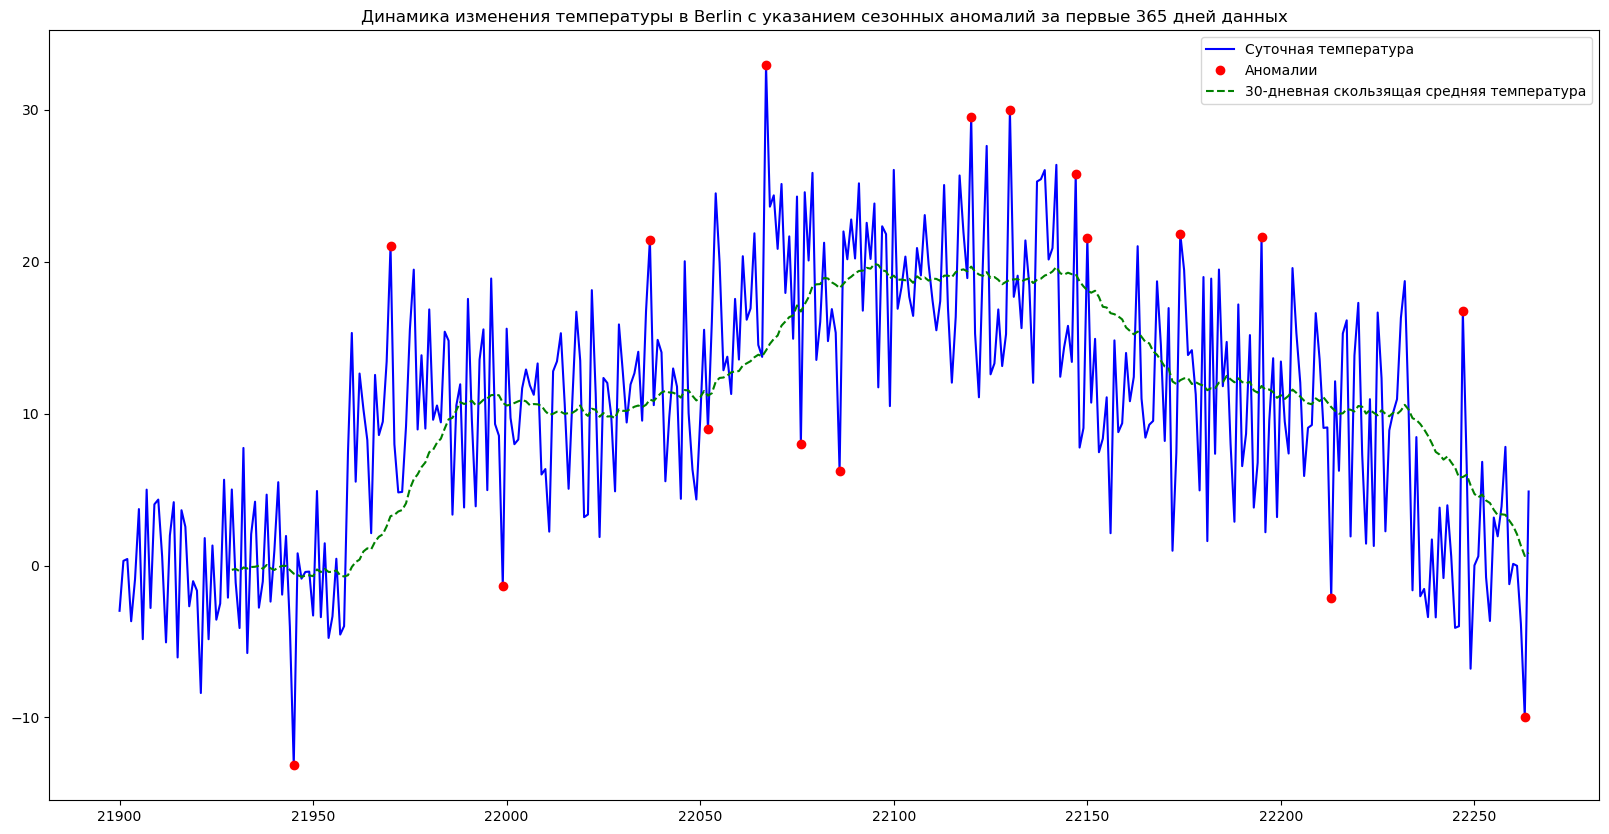

In [124]:
import matplotlib.pyplot as plt

from datetime import date, time, datetime
import matplotlib.dates as mdates

city = 'Berlin'
data = df[df['city'] == city]

#data.reset_index(drop=True, inplace=True)

start = 0
stop = 365

temp = data['temperature'][start:stop]
dates = data['timestamp'][start:stop]
fig, ax = plt.subplots(figsize=(20, 10))

temp_abnormal = data['temperature'][start:stop][data['Аномалия по сезону'] == True]
date_abnormal = data['timestamp'][start:stop][data['Аномалия по сезону'] == True]

B = temp.rolling(window=30).mean()


plt.title(f"Динамика изменения температуры в {city} c указанием сезонных аномалий за первые 365 дней данных")

plt.plot(temp, 'b',  label="Суточная температура")
plt.plot(temp_abnormal, 'ro',  label="Аномалии")

plt.plot(B, 'g--',  label="30-дневная скользящая средняя температура")




plt.legend() 
plt.show()




# Генерация данных

In [13]:
import pandas as pd
import numpy as np

# Реальные средние температуры (примерные данные) для городов по сезонам
seasonal_temperatures = {
    "New York": {"winter": 0, "spring": 10, "summer": 25, "autumn": 15},
    "London": {"winter": 5, "spring": 11, "summer": 18, "autumn": 12},
    "Paris": {"winter": 4, "spring": 12, "summer": 20, "autumn": 13},
    "Tokyo": {"winter": 6, "spring": 15, "summer": 27, "autumn": 18},
    "Moscow": {"winter": -10, "spring": 5, "summer": 18, "autumn": 8},
    "Sydney": {"winter": 12, "spring": 18, "summer": 25, "autumn": 20},
    "Berlin": {"winter": 0, "spring": 10, "summer": 20, "autumn": 11},
    "Beijing": {"winter": -2, "spring": 13, "summer": 27, "autumn": 16},
    "Rio de Janeiro": {"winter": 20, "spring": 25, "summer": 30, "autumn": 25},
    "Dubai": {"winter": 20, "spring": 30, "summer": 40, "autumn": 30},
    "Los Angeles": {"winter": 15, "spring": 18, "summer": 25, "autumn": 20},
    "Singapore": {"winter": 27, "spring": 28, "summer": 28, "autumn": 27},
    "Mumbai": {"winter": 25, "spring": 30, "summer": 35, "autumn": 30},
    "Cairo": {"winter": 15, "spring": 25, "summer": 35, "autumn": 25},
    "Mexico City": {"winter": 12, "spring": 18, "summer": 20, "autumn": 15},
}

# Сопоставление месяцев с сезонами
month_to_season = {12: "winter", 1: "winter", 2: "winter",
                   3: "spring", 4: "spring", 5: "spring",
                   6: "summer", 7: "summer", 8: "summer",
                   9: "autumn", 10: "autumn", 11: "autumn"}

# Генерация данных о температуре
def generate_realistic_temperature_data(cities, num_years=10):
    dates = pd.date_range(start="2010-01-01", periods=365 * num_years, freq="D")
    data = []

    for city in cities:
        for date in dates:
            season = month_to_season[date.month]
            mean_temp = seasonal_temperatures[city][season]
            # Добавляем случайное отклонение
            temperature = np.random.normal(loc=mean_temp, scale=5)
            data.append({"city": city, "timestamp": date, "temperature": temperature})

    df = pd.DataFrame(data)
    df['season'] = df['timestamp'].dt.month.map(lambda x: month_to_season[x])
    return df

# Генерация данных
data = generate_realistic_temperature_data(list(seasonal_temperatures.keys()))
data.to_csv('temperature_data.csv', index=False)